# K-Nearest Neighbors (KNN)

* O KNN utiliza uma lógica baseada em similaridade entre **K pontos mais próximos** do dataset para estimar o valor das *novas* observações.

* Pode ser utilizado para **classificação** ou **regressão**

* O processamento é feito no momento da previsão e, por isso, esse aprendizado é chamado de "lazy learning", o que pode ser custoso para grandes conjuntos de dados e modelos que necessitem de previsão imediata.

* Por padrão, todos os dados possuem o mesmo peso na previsão, entretanto, é possível estipular *weights* com o valor *distance* para fazer os pontos mais próximos terem mais influência na previsão.

* É possível utilizar o **RadiusNeighborsClassifier** para classificar os vizinhos dentro de um raio específico.

In [2]:
import pandas as pd

In [5]:
# Usando a base de dados abaixo
dados = {
    'A': [1,1.5,2,1.5,-1,-0.5,0,-0.5],
    'A2': [-0.5,0,-0.5,-1,1.5,2,1.5,1],
    'B': [1,1.5,1,0.5,-1,-0.5,-1,-1.5],
    'B2': [-1.5,-1,-0.5,-1,0.5,1,1.5,1],
    'y': [1,1,1,1,0,0,0,0],
    'y2': [0,0,0,0,1,1,1,1]
}

dados = pd.DataFrame(dados)

In [6]:
# E esses dados para fazer a previsão
dados_pred = {
    'A': [2.5,1.8,0.5,-1,-1],
    'B': [2,1,0,0,-1.5],    
    'A2': [2.5,1.8,0.5,-1,-1],
    'B2': [2,1,0,0,-1.5],     
}

dados_pred = pd.DataFrame(dados_pred)

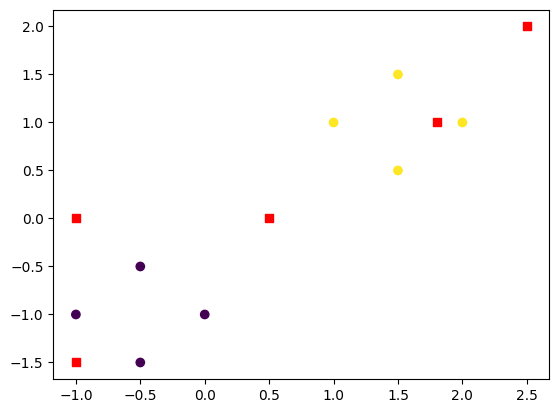

In [7]:
# Podemos visualizar graficamente esses pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c='r',marker='s')

plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# n_neighbors = número de vizinhos mais próximos

neigh = KNeighborsClassifier(n_neighbors=3)

In [8]:
dados

,A,A2,B,B2,y,y2
0,1.0,-0.5,1.0,-1.5,1,0
1,1.5,0.0,1.5,-1.0,1,0
2,2.0,-0.5,1.0,-0.5,1,0
3,1.5,-1.0,0.5,-1.0,1,0
4,-1.0,1.5,-1.0,0.5,0,1
5,-0.5,2.0,-0.5,1.0,0,1
6,0.0,1.5,-1.0,1.5,0,1
7,-0.5,1.0,-1.5,1.0,0,1


In [11]:
# Dados de treino
X = dados[['A','B']]
y = dados.y

In [18]:
# Dados de teste
X_test = dados_pred[['A','B']]

In [20]:
# Realizando o fit e a previsão

neigh.fit(X,y)

y_pred = neigh.predict(X_test)

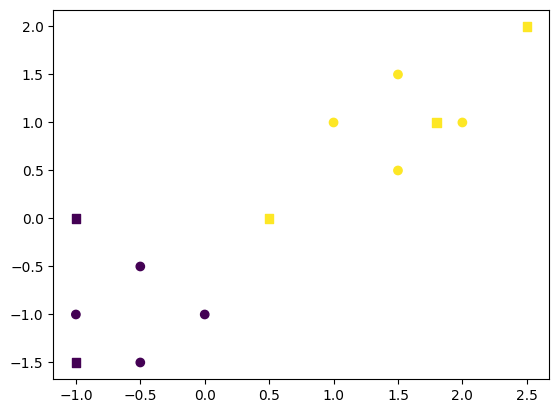

In [21]:
# Podemos visualizar graficamente esses pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c=y_pred,marker='s')

plt.show()

* O ponto central de teste ficou classificado como amarelo, mesmo tendo a mesma distância dos 4 vizinhos mais próximos. Dúvida: por que ele foi classificado como amarelo e não como roxo?
    - Em relação ao algoritmo KNN, se dois vizinhos tiverem distâncias iguais, mas rótulos diferentes, o resultado dependerá da ordenação dos dados de treinamento

In [22]:
dados[['A','B','y']]

,A,B,y
0,1.0,1.0,1
1,1.5,1.5,1
2,2.0,1.0,1
3,1.5,0.5,1
4,-1.0,-1.0,0
5,-0.5,-0.5,0
6,0.0,-1.0,0
7,-0.5,-1.5,0


* Nota-se que a classificação está ordenada como tipo 1 primeiro depois como tipo zero, por isso o ponto central ficou classificado como amarelo (1)

* Vamos realizar a ordenação contrária

In [23]:
neigh2 = KNeighborsClassifier(n_neighbors=3)

X2 = dados[['A2','B2']]
y2 = dados.y2

X_test2 = dados_pred[['A2','B2']]

neigh2.fit(X2,y2)

y_pred2 = neigh2.predict(X_test2)

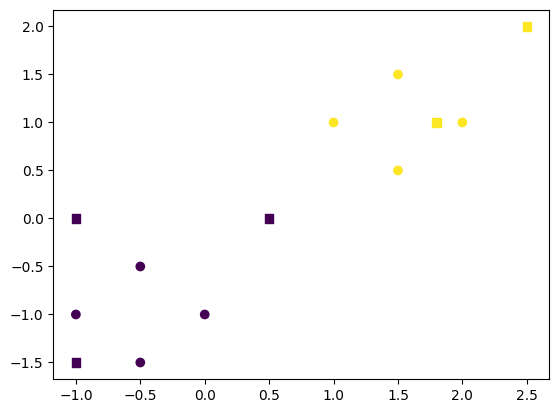

In [24]:
# Podemos visualizar graficamente esses pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c=y_pred2,marker='s')

plt.show()

* Como mudamos a ordenação, o ponto central ficou classifcado como 0 (roxo)

* Considerar números ímpares de vizinhos é melhor para não dar empate na classificação

# Dataset Iris

In [30]:
import pandas as pd

In [25]:
from sklearn.datasets import load_iris

In [26]:
iris = load_iris()

In [31]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [33]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* Considerando apenas dados com target 1 e 2, e apenas colunas de pétalas

In [40]:
iris1 = iris_df.loc[iris_df.target != 0, ['petal length (cm)', 'petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [41]:
X = iris1[['petal length (cm)', 'petal width (cm)']]
y = iris1.target

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

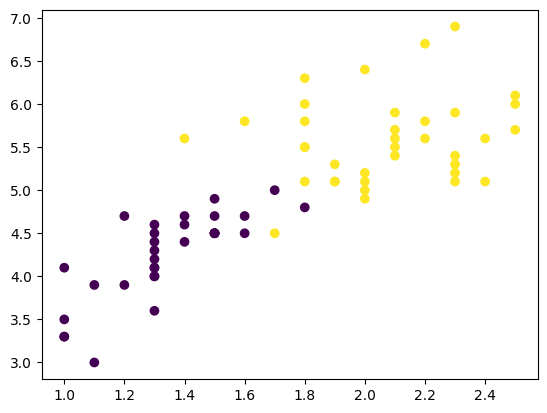

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=X_train['petal width (cm)'],
           y=X_train['petal length (cm)'],
           c=y_train,
           cmap='viridis')

plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]], dtype=int64)

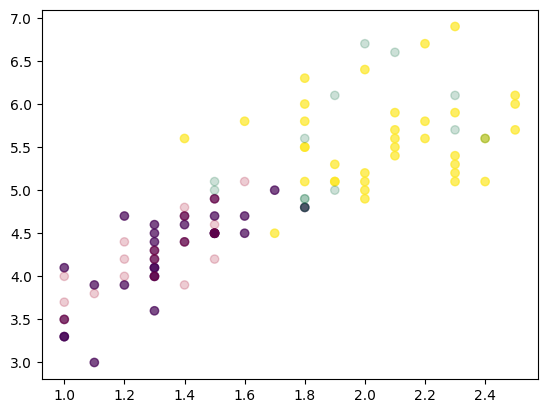

In [54]:
fig, ax = plt.subplots()

ax.scatter(x=X_train['petal width (cm)'],
           y=X_train['petal length (cm)'],
           c=y_train, alpha=0.7,
           cmap='viridis')

#ax.scatter(x=X_test['petal width (cm)'],
#           y=X_test['petal length (cm)'],
#           c=y_pred, alpha=0.2,
#           cmap='RdYlGn')

ax.scatter(x=X_test['petal width (cm)'],
           y=X_test['petal length (cm)'],
           c=y_test, alpha=0.2,
           cmap='RdYlGn')

plt.show()

In [ ]:
# Dados que o modelo previu errado, na matriz de confusão, 6 valores foram classificados como target 1 quando na verdade eram target 2
X_test[y_test != y_pred ]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
